In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score



X = pd.read_excel("heart.xlsx",sheet_name=0,header=0)
X = X.drop(X.columns[0], axis=1)
print(X.shape)

T = X.describe()  #on représente les statistiques descriptives
print(T)


(303, 14)
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860

In [3]:
print(X.mean()) 
print(X.var()) 

age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64
age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64


<Figure size 800x600 with 0 Axes>

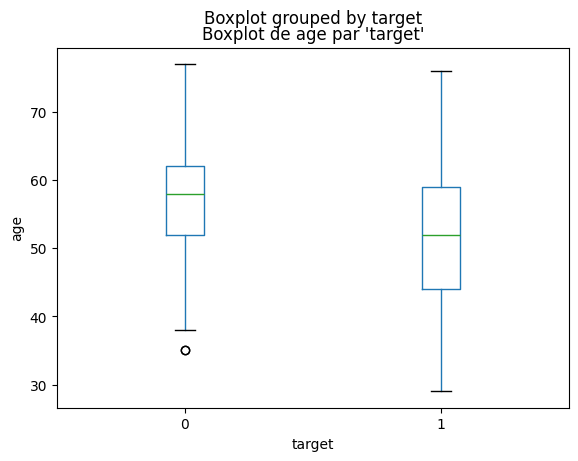

<Figure size 800x600 with 0 Axes>

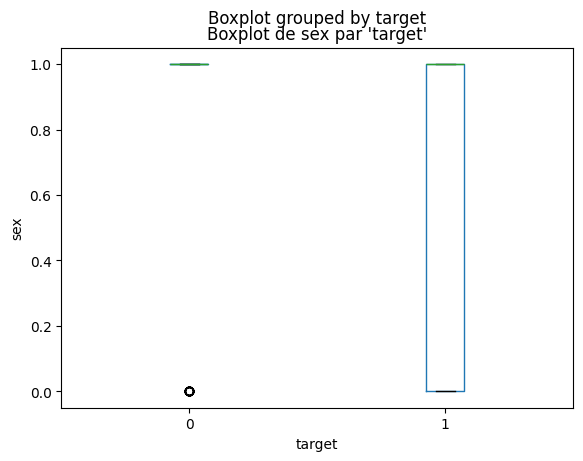

<Figure size 800x600 with 0 Axes>

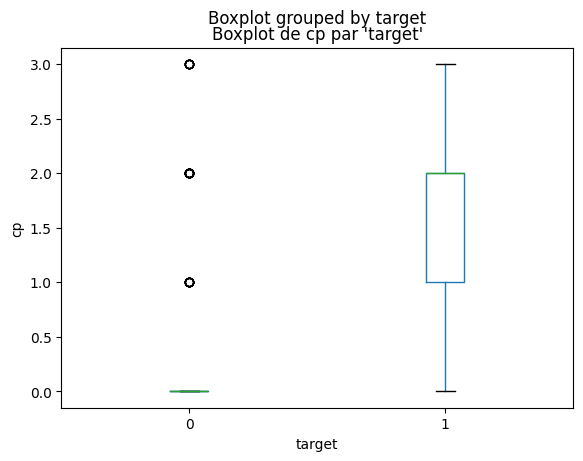

<Figure size 800x600 with 0 Axes>

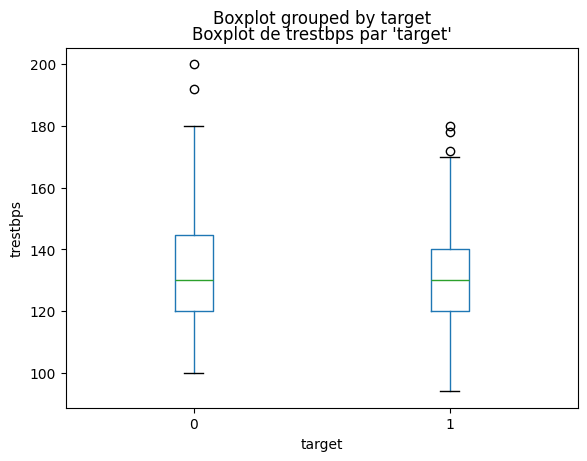

<Figure size 800x600 with 0 Axes>

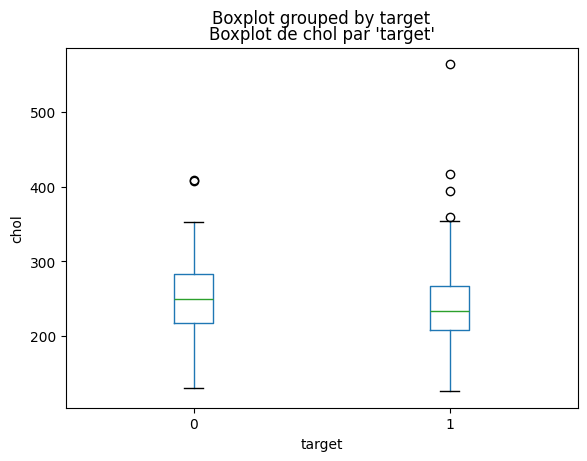

<Figure size 800x600 with 0 Axes>

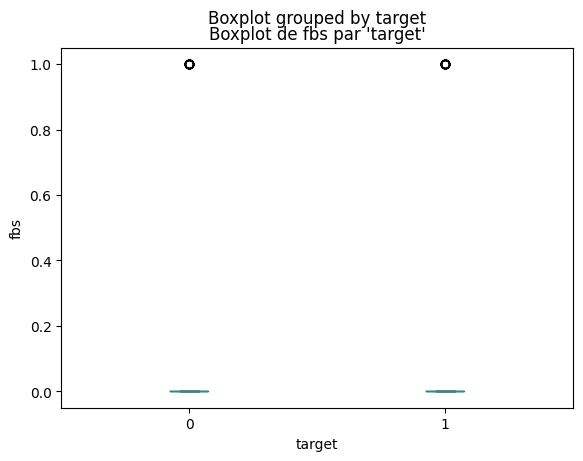

<Figure size 800x600 with 0 Axes>

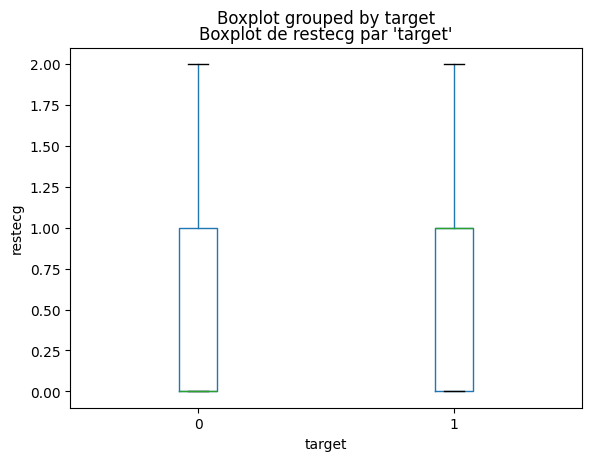

<Figure size 800x600 with 0 Axes>

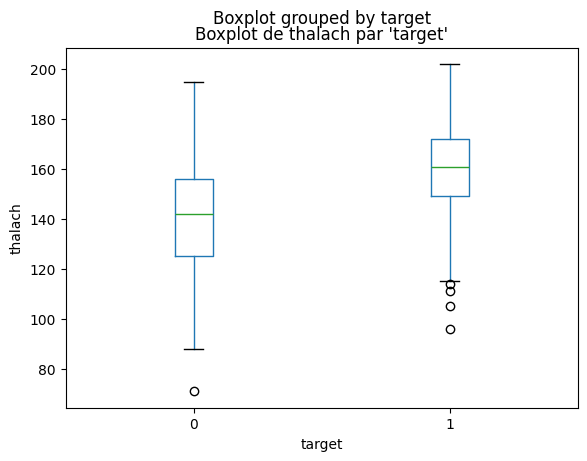

<Figure size 800x600 with 0 Axes>

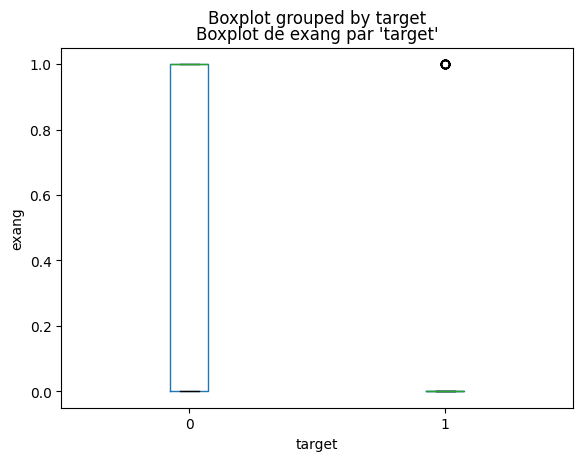

<Figure size 800x600 with 0 Axes>

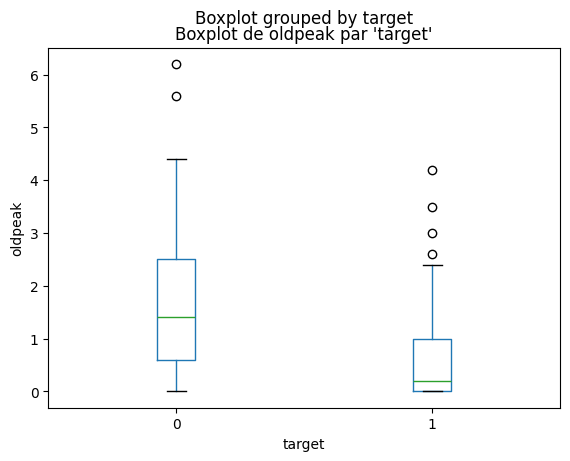

<Figure size 800x600 with 0 Axes>

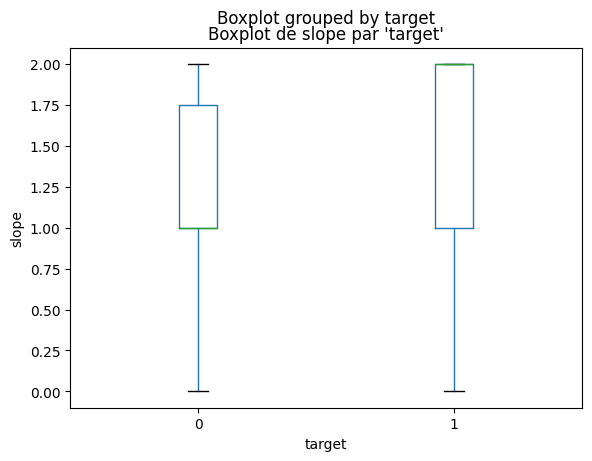

<Figure size 800x600 with 0 Axes>

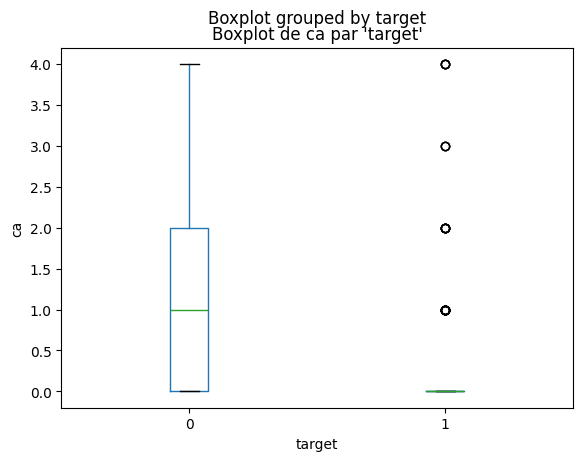

<Figure size 800x600 with 0 Axes>

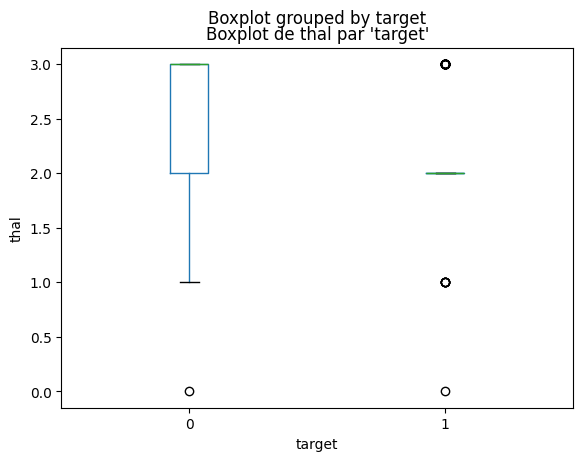

In [4]:
# Affichage des boxplots triés par 'target'
for column in X.columns[0:len(X.columns)-1]:  #on exclut la colonne 'target'
    plt.figure(figsize=(8, 6))
    X.boxplot(column=column, by='target', grid=False)
    plt.title(f"Boxplot de {column} par 'target'")
    plt.xlabel('target')
    plt.ylabel(column)
    plt.show()

plt.show()

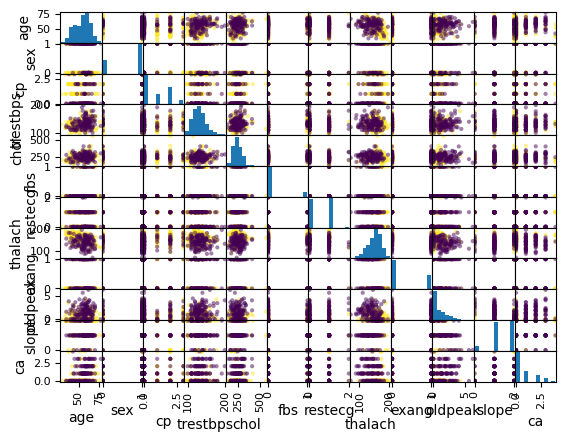

<Figure size 1500x1500 with 0 Axes>

In [5]:
X1 = X.copy()
le = LabelEncoder()

pd.plotting.scatter_matrix(X1.iloc[:,:-2], c=X1['target'])
plt.figure(figsize=(15, 15))
plt.show()  # Affiche les graphiques

On ne peut pas conclure de cette matrice

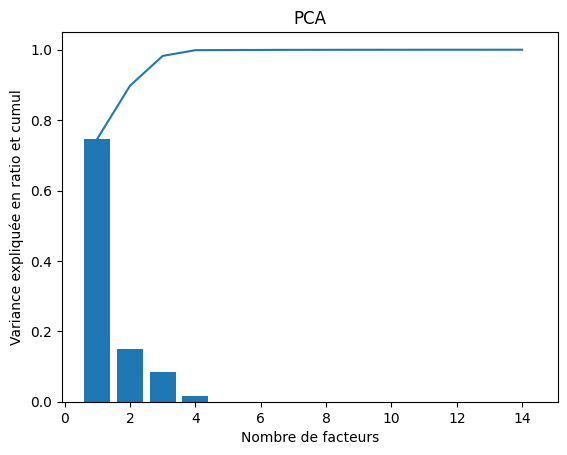

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

acp = PCA() 
Xacp = acp.fit_transform(X1) 
"""
scaler = StandardScaler()
Xacp = scaler.fit_transform(Xdf)     # on pourrait aussi faire (X1 - mean)/std (l'écart type)
Xacp = acp.fit_transform(Xacp)
"""
plt.figure() 
# Graphique des variances expliquées 
acp.explained_variance_     #Valeurs propres
acp.explained_variance_ratio_
acp.components_ #vecteurs propres


plt.bar(np.arange(1, len(acp.explained_variance_ratio_)+1), acp.explained_variance_ratio_) 
plt.plot(np.arange(1, len(acp.explained_variance_ratio_)+1), np.cumsum(acp.explained_variance_ratio_)) 
plt.ylabel("Variance expliquée en ratio et cumul") 
plt.xlabel("Nombre de facteurs") 
plt.title("PCA")
plt.show()

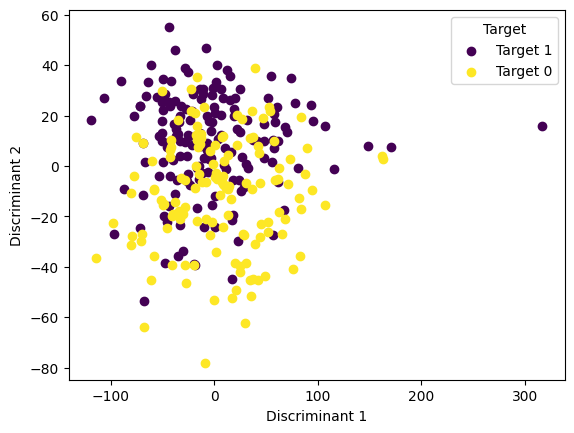

In [7]:
plt.figure()

# Création d'une palette de couleurs, juste esthétique
unique_codes = X1['target'].unique()
colors = cm.viridis(np.linspace(0, 1, len(unique_codes)))  # Génère des couleurs distinctes
color_map = dict(zip(unique_codes, colors))  # Associe chaque code à une couleur

# Tracé des points avec les couleurs correspondantes
for target in unique_codes:
    mask = X1['target'] == target
    plt.scatter(Xacp[mask, 0], Xacp[mask, 1], color=color_map[target], label=f'Target {target}')     #on sélectionne les composantes discriminantes 1 et 2

# Ajout des étiquettes et de la légende
plt.xlabel('Discriminant 1')
plt.ylabel('Discriminant 2')
plt.legend(title='Target')
plt.show()

Même si le pareto nous dit que deux composants discriminantes permettent de bien séparer target, en les visualisants on remarque que beaucoup de ces valeurs sont superposées.

fpr : 
[0.         0.00724638 0.0942029  0.35507246 1.        ]
tpr : 
[0.         0.00606061 0.04242424 0.83030303 1.        ]
threshold : 
[inf  0. -1. -2. -3.]


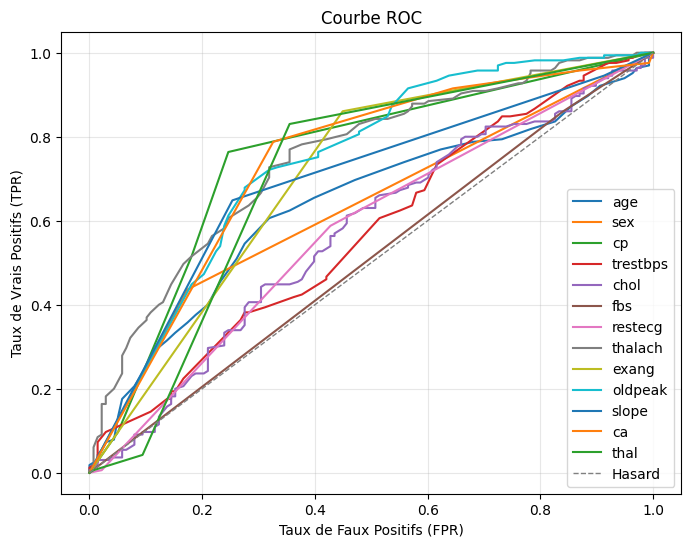

In [8]:
#on va faire la courbe ROC avec roc_curve
plt.figure(figsize=(8, 6))
y_true = X1['target']
for i in range(13):
    y_score =  X1.iloc[:,i]
    auc = (roc_auc_score(y_true, y_score))
    #fpr, tpr, threshold = roc_curve(y_true, y_score, pos_label=1)
    
    if (auc > 0.5):
        fpr, tpr, threshold = roc_curve(y_true, y_score, pos_label=1)
    else:
        fpr, tpr, threshold = roc_curve(y_true, -y_score, pos_label=1)
    #print(auc)
    #pos_label =1 signifie que 1 est le label positif (non défectueux)
        
    # Tracé de la courbe ROC
    plt.plot(fpr, tpr, label = X1.columns[i])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)



#fpr, tpr, threshold = roc_curve(y_true, Xacp, pos_label=1)
#plt.plot(fpr, tpr, label = X1.columns[i])
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label='Hasard')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)

print("fpr : ")
print(fpr)
print("tpr : ")
print(tpr)
print("threshold : ")
print(threshold)

plt.show()


In [9]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(X1['target'])

# Split Apprentissage / Validation / Test (on prend 60% train, 20% validation, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=10)  # 0.25 * 0.8 = 0.2 du total

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)


(181, 14)
(61, 14)
(61, 14)


[1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0]
Recall arbre de décision : 0.7575757575757576


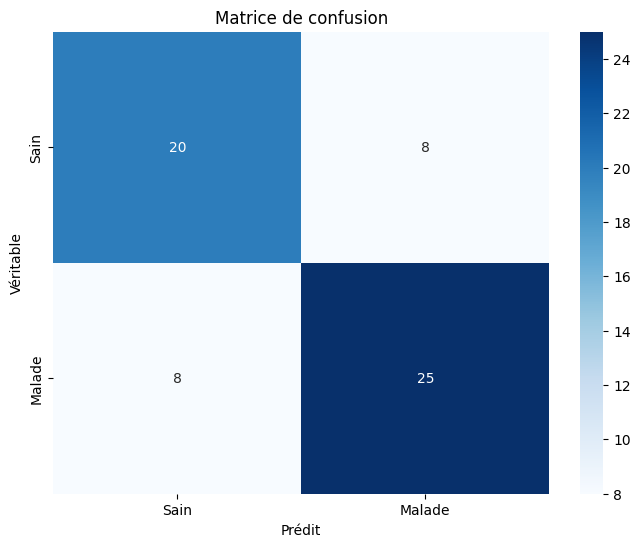

In [10]:
#Arbre de décision

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train.iloc[:, :13], y_train)
#faire des boucles pour essayer tout les paramètres possibles

y_pred = clf.predict(X_val.iloc[:, :13])
print(y_pred)

decision_path = clf.decision_path(X_train.iloc[:, :13])
#print(decision_path)

print("Recall arbre de décision :", recall_score(y_val, y_pred))
#Matrice de confusion pour l'arbre de décision
confusion = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Sain', 'Malade'], yticklabels=['Sain', 'Malade'])
plt.title('Matrice de confusion')
plt.xlabel('Prédit')
plt.ylabel('Véritable')
plt.show()


Split 1 - Gini, recall score : 0.8182
Split 1 - Entropy, recall score : 0.8788
Split 2 - Gini, recall score : 0.7273
Split 2 - Entropy, recall score : 0.7576
Split 3 - Gini, recall score : 0.8182
Split 3 - Entropy, recall score : 0.7273
Split 4 - Gini, recall score : 0.7879
Split 4 - Entropy, recall score : 0.7576
Split 5 - Gini, recall score : 0.7879
Split 5 - Entropy, recall score : 0.8182
Split 6 - Gini, recall score : 0.8485
Split 6 - Entropy, recall score : 0.8182
Split 7 - Gini, recall score : 0.7576
Split 7 - Entropy, recall score : 0.8485
Split 8 - Gini, recall score : 0.7273
Split 8 - Entropy, recall score : 0.8485
Split 9 - Gini, recall score : 0.8485
Split 9 - Entropy, recall score : 0.8485
Split 10 - Gini, recall score : 0.7576
Split 10 - Entropy, recall score : 0.7273
Split 11 - Gini, recall score : 0.7576
Split 11 - Entropy, recall score : 0.7879
Split 12 - Gini, recall score : 0.6364
Split 12 - Entropy, recall score : 0.7273
Split 13 - Gini, recall score : 0.6061
Split 1

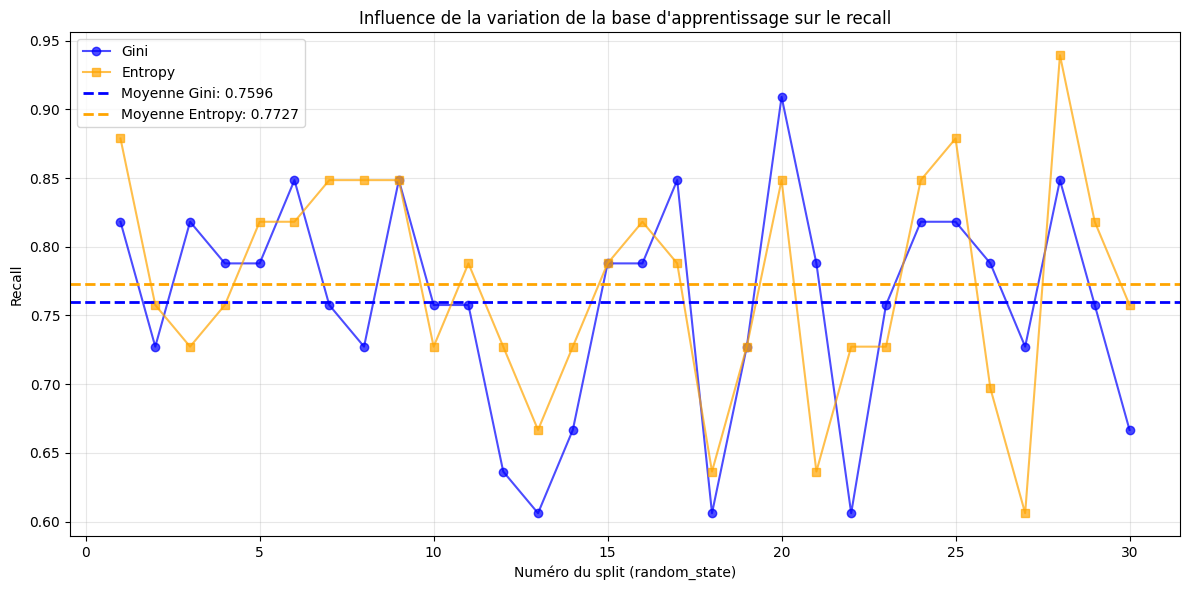


Statistiques Gini - Min: 0.6061, Max: 0.9091, Écart: 0.3030
Statistiques Entropy - Min: 0.6061, Max: 0.9394, Écart: 0.3333


In [23]:
#Influence de la variation de la base d'apprentissage sur le recall
recall_gini_list = []
recall_entropy_list = []

for i in range(1, 31):
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=i)
    
    clf = DecisionTreeClassifier(criterion='gini', random_state=0)
    clf.fit(X_train.iloc[:, :13], y_train)
    y_pred = clf.predict(X_val.iloc[:, :13])
    recall = recall_score(y_val, y_pred)
    recall_gini_list.append(recall)
    print(f"Split {i} - Gini, recall score : {recall:.4f}")

    clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
    clf.fit(X_train.iloc[:, :13], y_train)
    y_pred = clf.predict(X_val.iloc[:, :13])
    recall = recall_score(y_val, y_pred)
    recall_entropy_list.append(recall)
    print(f"Split {i} - Entropy, recall score : {recall:.4f}")

# Création du graphique
plt.figure(figsize=(12, 6))
splits = list(range(1, 31))
plt.plot(splits, recall_gini_list, marker='o', label='Gini', color='blue', alpha=0.7)
plt.plot(splits, recall_entropy_list, marker='s', label='Entropy', color='orange', alpha=0.7)

# Ajout des lignes de moyenne
plt.axhline(y=np.mean(recall_gini_list), color='blue', linestyle='--', linewidth=2, label=f'Moyenne Gini: {np.mean(recall_gini_list):.4f}')
plt.axhline(y=np.mean(recall_entropy_list), color='orange', linestyle='--', linewidth=2, label=f'Moyenne Entropy: {np.mean(recall_entropy_list):.4f}')

plt.xlabel('Numéro du split (random_state)')
plt.ylabel('Recall')
plt.title('Influence de la variation de la base d\'apprentissage sur le recall')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nStatistiques Gini - Min: {np.min(recall_gini_list):.4f}, Max: {np.max(recall_gini_list):.4f}, Écart: {np.max(recall_gini_list) - np.min(recall_gini_list):.4f}")
print(f"Statistiques Entropy - Min: {np.min(recall_entropy_list):.4f}, Max: {np.max(recall_entropy_list):.4f}, Écart: {np.max(recall_entropy_list) - np.min(recall_entropy_list):.4f}")


Résultats assez sensibles à la base d'apprentissage, variations d'environ 0,35 du recall au maximum entre le pire et le meilleur

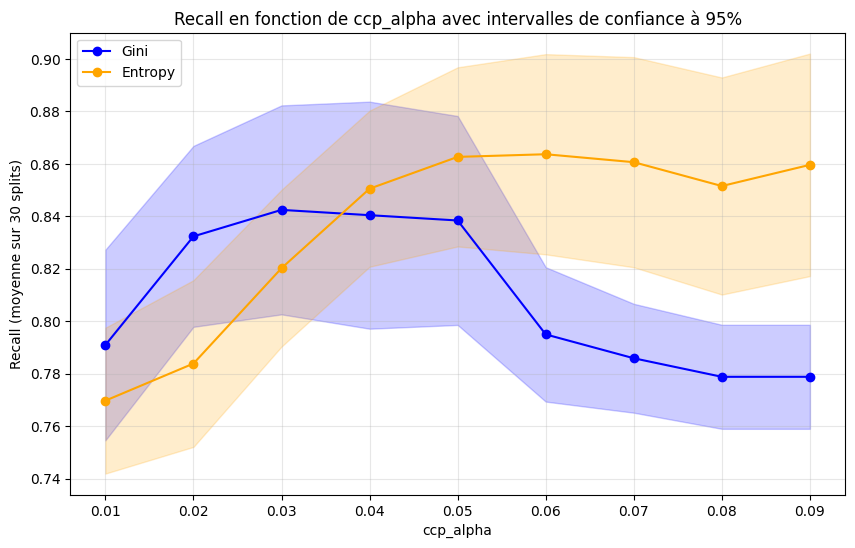

In [24]:

#graphique de l'accuracy en fonction de ccp_alpha avec intervalles de confiance
ccp_alphas = [i*0.01 for i in range(1, 10)]
recall_gini = []
recall_entropy = []
std_gini = []
std_entropy = []

for alpha in ccp_alphas:
    temp_gini = []
    temp_entropy = []
    
    for i in range(30):
        X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=i)
        X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=i)
        
        clf_gini = DecisionTreeClassifier(criterion='gini', random_state=0, ccp_alpha=alpha)
        clf_gini.fit(X_train.iloc[:, :13], y_train)
        y_pred_gini = clf_gini.predict(X_val.iloc[:, :13])
        recall_gini1 = recall_score(y_val, y_pred_gini)
        temp_gini.append(recall_gini1)

        clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0, ccp_alpha=alpha)
        clf_entropy.fit(X_train.iloc[:, :13], y_train)
        y_pred_entropy = clf_entropy.predict(X_val.iloc[:, :13])
        recall_entropy1 = recall_score(y_val, y_pred_entropy)
        temp_entropy.append(recall_entropy1)
    
    # Calcul de la moyenne et de l'écart-type des 30 résultats
    recall_gini.append(np.mean(temp_gini))
    recall_entropy.append(np.mean(temp_entropy))
    std_gini.append(np.std(temp_gini))
    std_entropy.append(np.std(temp_entropy))

# Conversion en arrays numpy pour faciliter les calculs
recall_gini = np.array(recall_gini)
recall_entropy = np.array(recall_entropy)
std_gini = np.array(std_gini)
std_entropy = np.array(std_entropy)

# Calcul des intervalles de confiance à 95% (1.96 * écart-type)
ic_gini = 1.96 * std_gini / np.sqrt(30)
ic_entropy = 1.96 * std_entropy / np.sqrt(30)

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, recall_gini, marker='o', label='Gini', color='blue')
plt.fill_between(ccp_alphas, recall_gini - ic_gini, recall_gini + ic_gini, alpha=0.2, color='blue')

plt.plot(ccp_alphas, recall_entropy, marker='o', label='Entropy', color='orange')
plt.fill_between(ccp_alphas, recall_entropy - ic_entropy, recall_entropy + ic_entropy, alpha=0.2, color='orange')

plt.xlabel('ccp_alpha')
plt.ylabel('Recall (moyenne sur 30 splits)')
plt.title('Recall en fonction de ccp_alpha avec intervalles de confiance à 95%')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Commentaire sur balanced accuracy (non présenté ici) :
En faisant une moyenne sur 30 split, on remarque qu'une valeur de ccp_alpha faible est plus adapté pour le modèle Gini (ccp_alpha = 0,02 ou 0,01 selon les tests)
Pour le modèle Entropy, un ccp_alpha = 0,03 est plus adapté

Commentaire sur Recall :
meilleur résultat pour entropy avec ccp_alpha = 0,05

Recall moyen arbre de décision : 0.8586 ± 0.0959

Matrice de confusion moyenne sur 30 splits:
[[17.76666667 10.23333333]
 [ 4.66666667 28.33333333]]

Intervalles de confiance à 95% (±):
[[1.14913638 1.14913638]
 [1.13286317 1.13286317]]


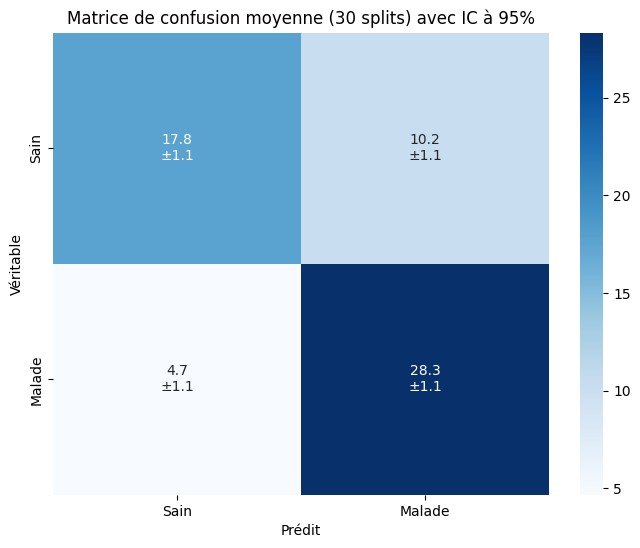

In [108]:
#meilleur modèle avec ccp_alpha = 0.05 et criterion = 'entropy'
# Calcul de la matrice de confusion moyenne sur 30 splits avec intervalles de confiance

confusion_sum = np.zeros((2, 2))
confusion_list = []
recall_list = []

for i in range(1, 31):
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=i)
    
    clf_gini = DecisionTreeClassifier(criterion='entropy', random_state=0, ccp_alpha=0.05)
    clf_gini.fit(X_train.iloc[:, :13], y_train)
    y_pred_gini = clf_gini.predict(X_val.iloc[:, :13])
    
    recall = recall_score(y_val, y_pred_gini)
    recall_list.append(recall)
    
    confusion = confusion_matrix(y_val, y_pred_gini)
    confusion_list.append(confusion)
    confusion_sum += confusion

# Calcul de la moyenne et de l'écart-type pour chaque cellule
confusion_moyenne = confusion_sum / 30
confusion_array = np.array(confusion_list)
confusion_std = np.std(confusion_array, axis=0)
confusion_ic = 1.96 * confusion_std / np.sqrt(30)  # IC à 95%

recall_moyen = np.mean(recall_list)
recall_std = np.std(recall_list)

print(f"Recall moyen arbre de décision : {recall_moyen:.4f} ± {recall_std:.4f}")
print(f"\nMatrice de confusion moyenne sur 30 splits:")
print(confusion_moyenne)
print(f"\nIntervalles de confiance à 95% (±):")
print(confusion_ic)

# Affichage de la matrice de confusion moyenne avec IC
plt.figure(figsize=(8, 6))
# Création des annotations avec IC
annot_text = np.empty_like(confusion_moyenne, dtype=object)
for i in range(2):
    for j in range(2):
        annot_text[i, j] = f'{confusion_moyenne[i, j]:.1f}\n±{confusion_ic[i, j]:.1f}'

sns.heatmap(confusion_moyenne, annot=annot_text, fmt='', cmap='Blues', 
            xticklabels=['Sain', 'Malade'], yticklabels=['Sain', 'Malade'])
plt.title('Matrice de confusion moyenne (30 splits) avec IC à 95%')
plt.xlabel('Prédit')
plt.ylabel('Véritable')
plt.show()


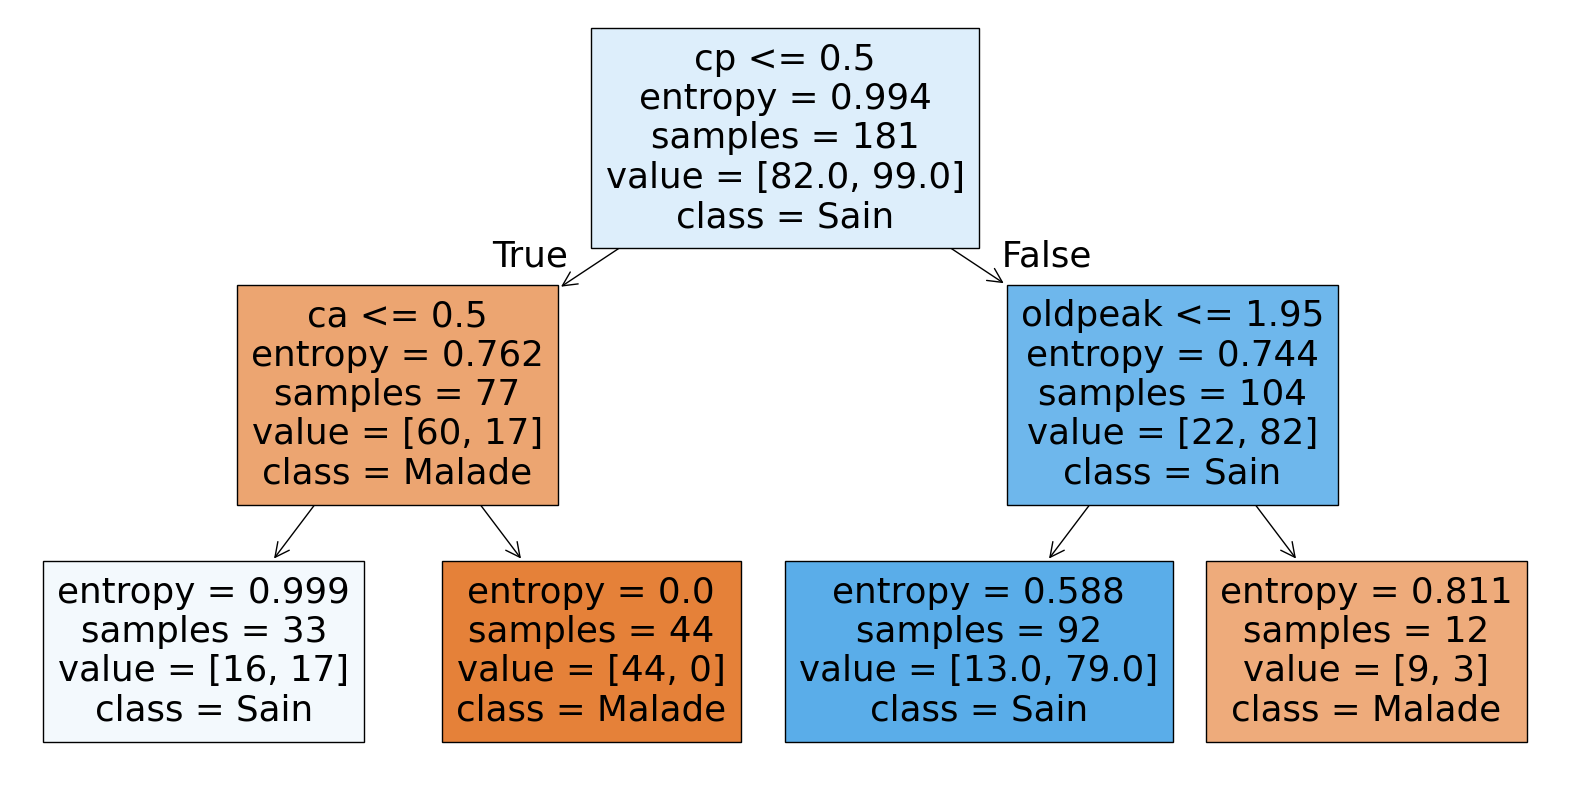

In [109]:
#représentation de l'arbre de décision
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf_gini, filled=True, feature_names=X.columns[:13], class_names=['Malade', 'Sain'])
plt.show()

In [110]:
#vérification du fonctionnement de l'arbre binaire avec grid search cv
param_grid = {
    'ccp_alpha': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05],
}

#on test avec gini
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=10), param_grid=param_grid, cv=5, scoring='recall_micro')
grid_search.fit(X_train.iloc[:, :13], y_train)


,estimator,DecisionTreeC...ndom_state=10)
,param_grid,"{'ccp_alpha': [0.0, 0.01, ...]}"
,scoring,'recall_micro'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


meilleur résultat pour gini : ccp_alpha = 0,01

In [111]:

#on test avec entropy
param_grid = {
    'ccp_alpha': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05],
}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(criterion = 'entropy',random_state=10), param_grid=param_grid, cv=5, scoring='recall_micro')
grid_search.fit(X_train.iloc[:, :13], y_train)

,estimator,DecisionTreeC...ndom_state=10)
,param_grid,"{'ccp_alpha': [0.0, 0.01, ...]}"
,scoring,'recall_micro'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [112]:
#foret aléatoire


for k in range(1, 11):
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val)  # 0.25 * 0.8 = 0.2 du total
    clf_rf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf_rf.fit(X_train.iloc[:, :12], y_train)
    y_pred = clf_rf.predict(X_val.iloc[:, :12])
    acc = recall_score(y_val, y_pred)
    print(f"Random forest, recall : {acc:.4f}")

Random forest, recall : 0.8788
Random forest, recall : 0.7273
Random forest, recall : 0.8485
Random forest, recall : 0.6667
Random forest, recall : 0.8788
Random forest, recall : 0.7576
Random forest, recall : 0.8788
Random forest, recall : 0.9394
Random forest, recall : 0.8485
Random forest, recall : 0.9091
Random forest, recall : 0.7576
Random forest, recall : 0.8788
Random forest, recall : 0.9394
Random forest, recall : 0.8485
Random forest, recall : 0.9091


influence de la séparation de la base de donnée moins importante que pour l'arbre binaire seul, mais toujours significatif

tout les modèles sont meilleurs que les résultats précédents

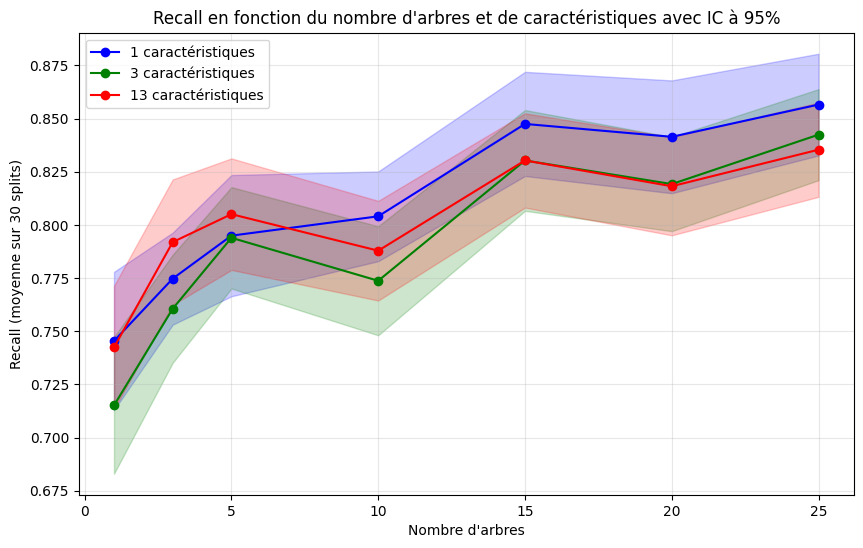

In [113]:
#on change le nombre d'arbres de la forêt ainsi que le nombre de caractéristiques

#graphique du recall en fonction du nombre d'arbres et de caractéristiques
nombre_arbres = [1, 3, 5, 10, 15, 20, 25]
nombre_caracteristiques = [1, int(np.sqrt(13)), 13]

recall_forest = {M: [] for M in nombre_caracteristiques}
std_forest = {M: [] for M in nombre_caracteristiques}

for B in nombre_arbres:
    for M in nombre_caracteristiques:
        temp_forest = []
        
        for i in range(30):
            X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=i)
            X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=i)
            
            clf_rf = RandomForestClassifier(n_estimators=B, random_state=0, max_features=M)
            clf_rf.fit(X_train.iloc[:, :13], y_train)
            y_pred_rf = clf_rf.predict(X_val.iloc[:, :13])
            recall_rf = recall_score(y_val, y_pred_rf)
            temp_forest.append(recall_rf)

        # Calcul de la moyenne et de l'écart-type des 30 résultats
        recall_forest[M].append(np.mean(temp_forest))
        std_forest[M].append(np.std(temp_forest))

# Conversion en arrays numpy
for M in nombre_caracteristiques:
    recall_forest[M] = np.array(recall_forest[M])
    std_forest[M] = np.array(std_forest[M])

# Calcul des intervalles de confiance à 95%
ic_forest = {M: 1.96 * std_forest[M] / np.sqrt(30) for M in nombre_caracteristiques}

# Définition des couleurs pour chaque courbe
colors = ['blue', 'green', 'red']

plt.figure(figsize=(10, 6))
for i, M in enumerate(nombre_caracteristiques):
    plt.plot(nombre_arbres, recall_forest[M], marker='o', label=f'{M} caractéristiques', color=colors[i])
    plt.fill_between(nombre_arbres, 
                     recall_forest[M] - ic_forest[M], 
                     recall_forest[M] + ic_forest[M], 
                     alpha=0.2, 
                     color=colors[i])

plt.xlabel('Nombre d\'arbres')
plt.ylabel('Recall (moyenne sur 30 splits)')
plt.title('Recall en fonction du nombre d\'arbres et de caractéristiques avec IC à 95%')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


meilleur résultat : 15 arbres différents et 1 caractéristiques différentes testées

Recall moyen forêt aléatoire : 0.8444 ± 0.0690

Matrice de confusion moyenne sur 30 splits:
[[21.63333333  6.36666667]
 [ 5.13333333 27.86666667]]

Intervalles de confiance à 95% (±):
[[0.75901101 0.75901101]
 [0.81461698 0.81461698]]


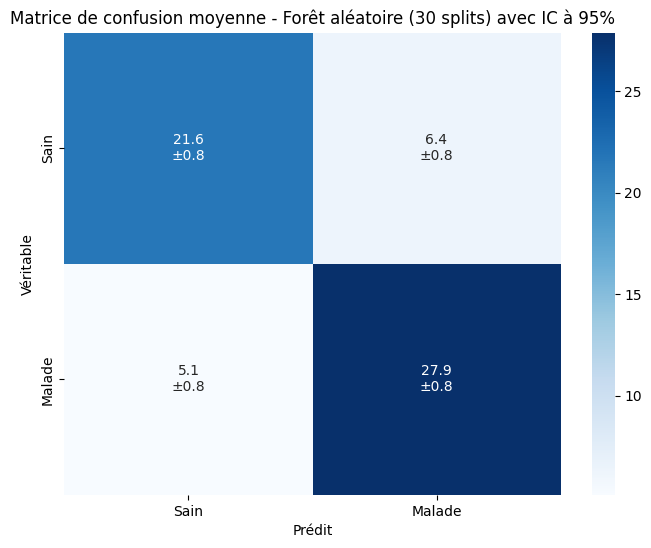

In [126]:
#meilleur modèle avec nombre arbres = 15 et max features = 1
# Calcul de la matrice de confusion moyenne sur 30 splits avec intervalles de confiance

confusion_sum_rf = np.zeros((2, 2))
confusion_list_rf = []
recall_list_rf = []

for i in range(1, 31):
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=i)
    
    clf_rf = RandomForestClassifier(n_estimators=15, random_state=0, max_features=1)
    clf_rf.fit(X_train.iloc[:, :13], y_train)
    y_pred_rf = clf_rf.predict(X_val.iloc[:, :13])
    
    recall = recall_score(y_val, y_pred_rf)
    recall_list_rf.append(recall)
    
    confusion = confusion_matrix(y_val, y_pred_rf)
    confusion_list_rf.append(confusion)
    confusion_sum_rf += confusion

# Calcul de la moyenne et de l'écart-type pour chaque cellule
confusion_moyenne_rf = confusion_sum_rf / 30
confusion_array_rf = np.array(confusion_list_rf)
confusion_std_rf = np.std(confusion_array_rf, axis=0)
confusion_ic_rf = 1.96 * confusion_std_rf / np.sqrt(30)  # IC à 95%

recall_moyen_rf = np.mean(recall_list_rf)
recall_std_rf = np.std(recall_list_rf)

print(f"Recall moyen forêt aléatoire : {recall_moyen_rf:.4f} ± {recall_std_rf:.4f}")
print(f"\nMatrice de confusion moyenne sur 30 splits:")
print(confusion_moyenne_rf)
print(f"\nIntervalles de confiance à 95% (±):")
print(confusion_ic_rf)

# Affichage de la matrice de confusion moyenne avec IC
plt.figure(figsize=(8, 6))
# Création des annotations avec IC
annot_text_rf = np.empty_like(confusion_moyenne_rf, dtype=object)
for i in range(2):
    for j in range(2):
        annot_text_rf[i, j] = f'{confusion_moyenne_rf[i, j]:.1f}\n±{confusion_ic_rf[i, j]:.1f}'

sns.heatmap(confusion_moyenne_rf, annot=annot_text_rf, fmt='', cmap='Blues', 
            xticklabels=['Sain', 'Malade'], yticklabels=['Sain', 'Malade'])
plt.title('Matrice de confusion moyenne - Forêt aléatoire (30 splits) avec IC à 95%')
plt.xlabel('Prédit')
plt.ylabel('Véritable')
plt.show()


Recall moyen arbre de décision : 0.8414 ± 0.1058
Recall moyen forêt aléatoire : 0.8616 ± 0.0535


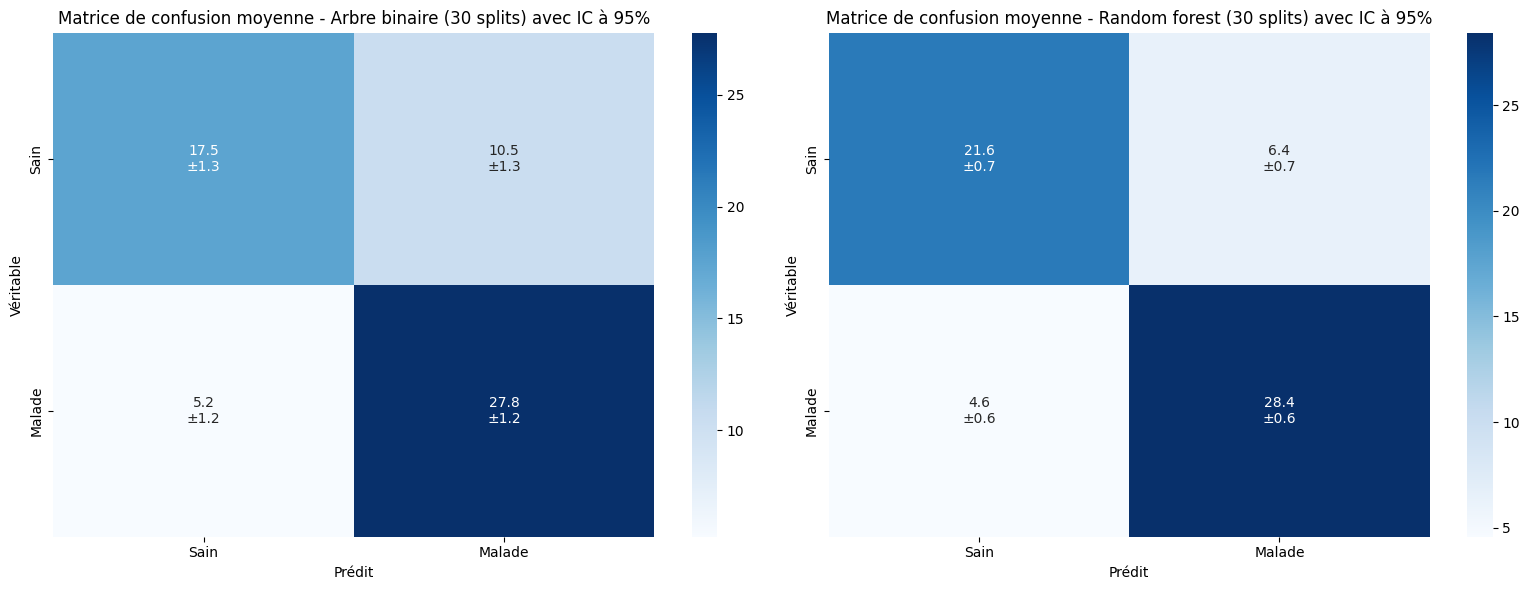

In [127]:
#Comparaison de l'arbre de décision et de la forêt aléatoire sur 30 splits

confusion_sum_dt = np.zeros((2, 2))
confusion_sum_rf = np.zeros((2, 2))
confusion_list_dt = []
confusion_list_rf = []
recall_list_dt = []
recall_list_rf = []

for i in range(1, 31):
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=i)
    
    # Arbre de décision
    clf_best = DecisionTreeClassifier(criterion='entropy', random_state=0, ccp_alpha=0.05)
    clf_best.fit(X_train.iloc[:, :13], y_train)
    y_pred = clf_best.predict(X_test.iloc[:, :13])
    recall_dt = recall_score(y_test, y_pred)
    recall_list_dt.append(recall_dt)
    confusion_dt = confusion_matrix(y_test, y_pred)
    confusion_list_dt.append(confusion_dt)
    confusion_sum_dt += confusion_dt
    
    # Forêt aléatoire
    clf_rf = RandomForestClassifier(n_estimators=15, random_state=0, max_features=1)
    clf_rf.fit(X_train.iloc[:, :13], y_train)
    y_pred_rf = clf_rf.predict(X_test.iloc[:, :13])
    recall_rf = recall_score(y_test, y_pred_rf)
    recall_list_rf.append(recall_rf)
    confusion_rf = confusion_matrix(y_test, y_pred_rf)
    confusion_list_rf.append(confusion_rf)
    confusion_sum_rf += confusion_rf

# Calcul des moyennes et des intervalles de confiance
confusion_moyenne_dt = confusion_sum_dt / 30
confusion_moyenne_rf = confusion_sum_rf / 30

confusion_array_dt = np.array(confusion_list_dt)
confusion_std_dt = np.std(confusion_array_dt, axis=0)
confusion_ic_dt = 1.96 * confusion_std_dt / np.sqrt(30)

confusion_array_rf = np.array(confusion_list_rf)
confusion_std_rf = np.std(confusion_array_rf, axis=0)
confusion_ic_rf = 1.96 * confusion_std_rf / np.sqrt(30)

recall_moyen_dt = np.mean(recall_list_dt)
recall_std_dt = np.std(recall_list_dt)
recall_moyen_rf = np.mean(recall_list_rf)
recall_std_rf = np.std(recall_list_rf)

print(f"Recall moyen arbre de décision : {recall_moyen_dt:.4f} ± {recall_std_dt:.4f}")
print(f"Recall moyen forêt aléatoire : {recall_moyen_rf:.4f} ± {recall_std_rf:.4f}")

# Affichage des matrices de confusion moyennes avec IC
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Création des annotations avec IC pour l'arbre de décision
annot_text_dt = np.empty_like(confusion_moyenne_dt, dtype=object)
for i in range(2):
    for j in range(2):
        annot_text_dt[i, j] = f'{confusion_moyenne_dt[i, j]:.1f}\n±{confusion_ic_dt[i, j]:.1f}'

sns.heatmap(confusion_moyenne_dt, annot=annot_text_dt, fmt='', cmap='Blues', 
            xticklabels=['Sain', 'Malade'], yticklabels=['Sain', 'Malade'], ax=axes[0])
axes[0].set_title('Matrice de confusion moyenne - Arbre binaire (30 splits) avec IC à 95%')
axes[0].set_xlabel('Prédit')
axes[0].set_ylabel('Véritable')

# Création des annotations avec IC pour la forêt aléatoire
annot_text_rf = np.empty_like(confusion_moyenne_rf, dtype=object)
for i in range(2):
    for j in range(2):
        annot_text_rf[i, j] = f'{confusion_moyenne_rf[i, j]:.1f}\n±{confusion_ic_rf[i, j]:.1f}'

sns.heatmap(confusion_moyenne_rf, annot=annot_text_rf, fmt='', cmap='Blues', 
            xticklabels=['Sain', 'Malade'], yticklabels=['Sain', 'Malade'], ax=axes[1])
axes[1].set_title('Matrice de confusion moyenne - Random forest (30 splits) avec IC à 95%')
axes[1].set_xlabel('Prédit')
axes[1].set_ylabel('Véritable')

plt.tight_layout()
plt.show()


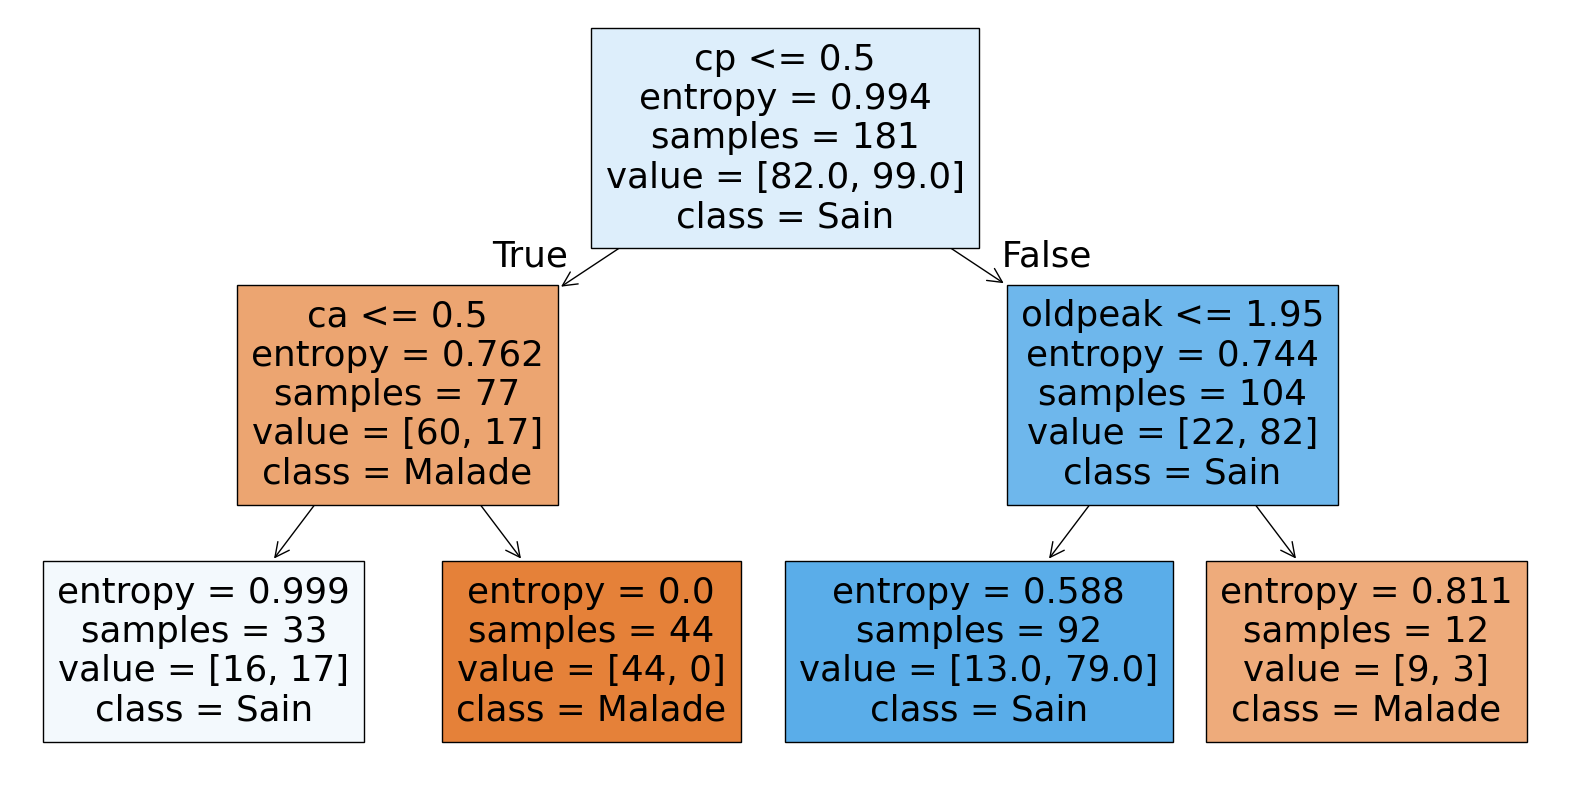

In [128]:
#représentation de l'arbre de décision
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf_best, filled=True, feature_names=X.columns[:13], class_names=['Malade', 'Sain'])
plt.show()



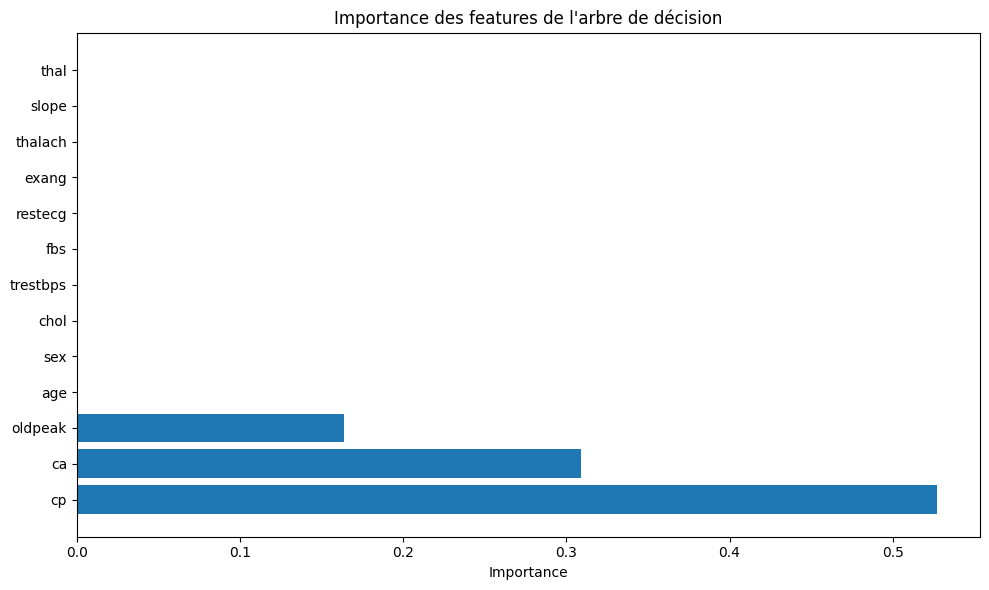

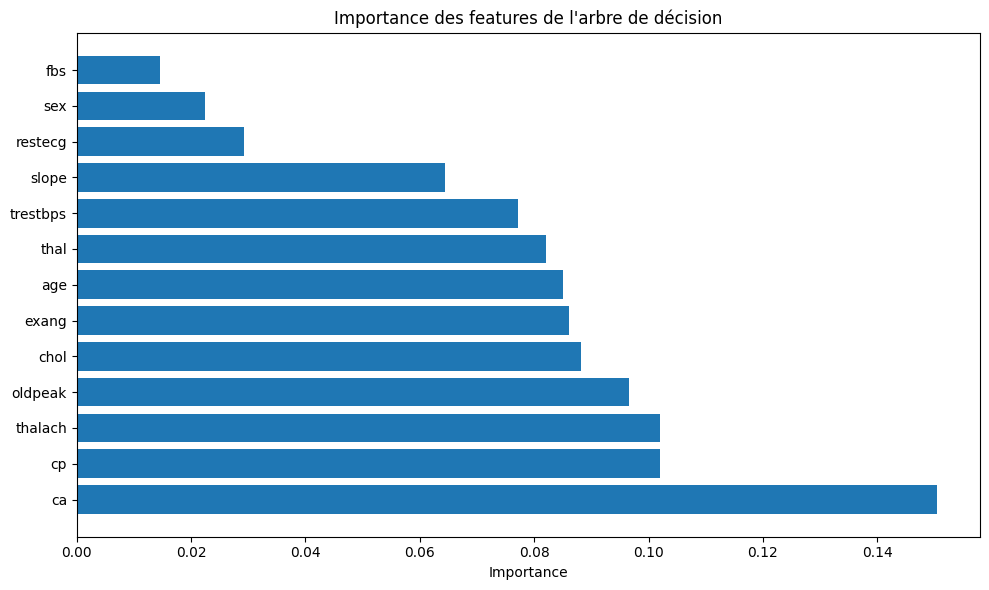

In [129]:
feature_names = X.columns[:13]

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': clf_best.feature_importances_
}).sort_values('importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.title("Importance des features de l'arbre de décision")
plt.tight_layout()


feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': clf_rf.feature_importances_
}).sort_values('importance', ascending=False)


# Visualiser importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.title("Importance des features de l'arbre de décision")
plt.tight_layout()
plt.show()